<a href="https://colab.research.google.com/github/Amitle51/understat_analysis_project/blob/main/understat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understat Football Match Analysis

## Objectives

In this analysis of Understat football match data, the goals are to:

*TBC*

## Data Loading and Description

In [2]:
import pandas as pd
df = pd.read_csv('/content/understat_per_game.csv')

In [ ]:
print("Missing Values:\n", df.isnull().sum())

In [ ]:
print("Duplicate Rows:", df.duplicated().sum())

In [27]:
df = df.astype({
    'league': 'category',
    'year': 'category',
    'team': 'category',
    'h_a': 'category',
    'result': 'category',
    'pts': 'category',
    'team': 'category'
})

In [28]:
print(df.dtypes)

league          category
year            category
h_a             category
xG               float64
xGA              float64
npxG             float64
npxGA            float64
deep               int64
deep_allowed       int64
scored             int64
missed             int64
xpts             float64
result          category
date              object
wins               int64
draws              int64
loses              int64
pts             category
npxGD            float64
ppda_coef        float64
ppda_att           int64
ppda_def           int64
oppda_coef       float64
oppda_att          int64
oppda_def          int64
team            category
xG_diff          float64
xGA_diff         float64
xpts_diff        float64
dtype: object


In [ ]:
df.describe()

## EDA

### Correlations

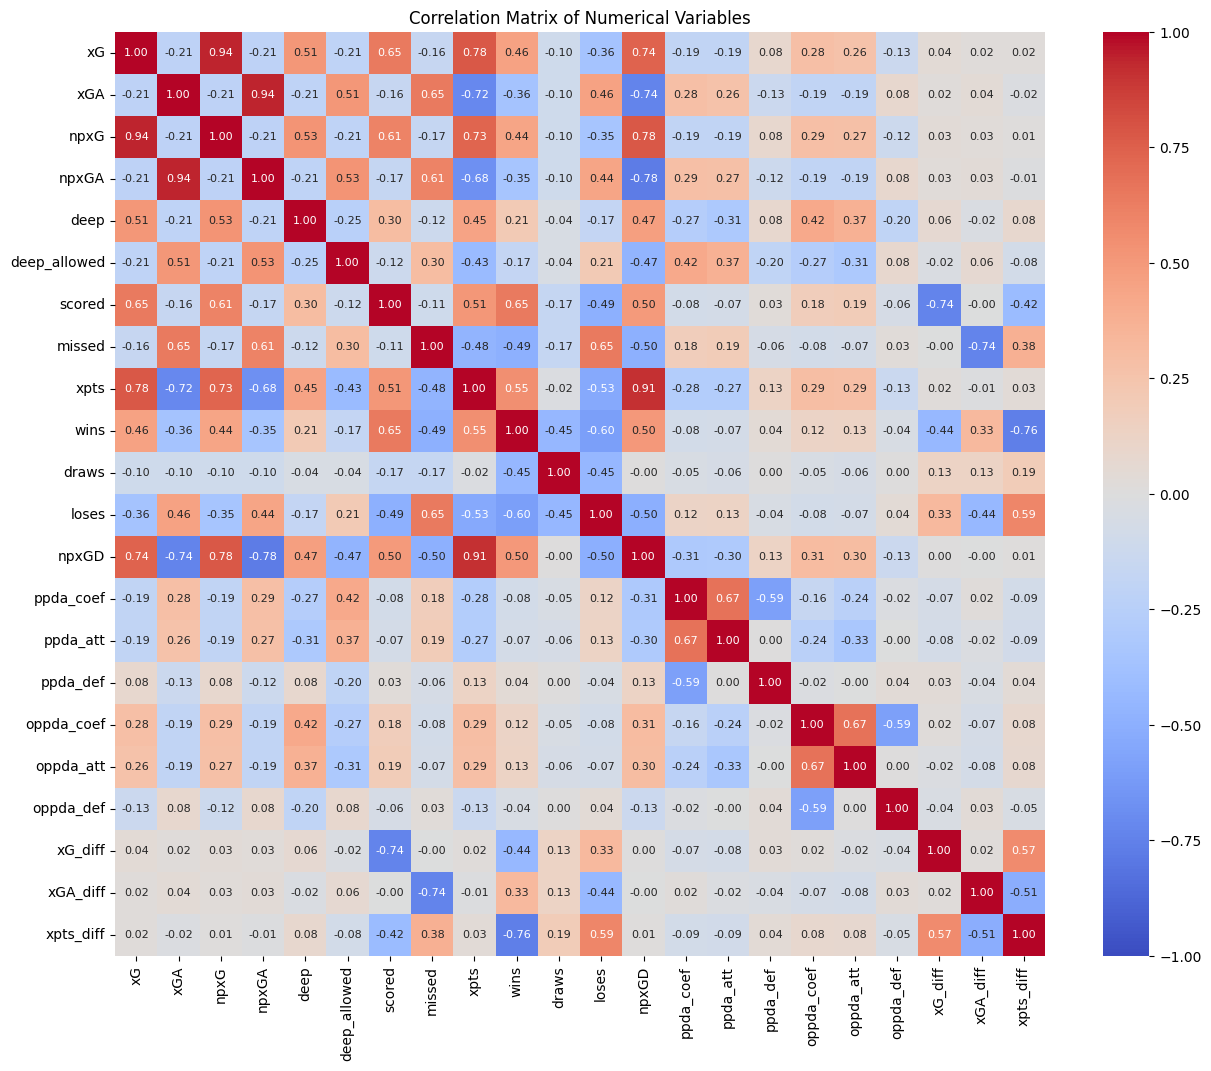

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_df = df.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix for numerical variables only
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))  # Increase the figure size
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})  # Adjust font size
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

### Distributions

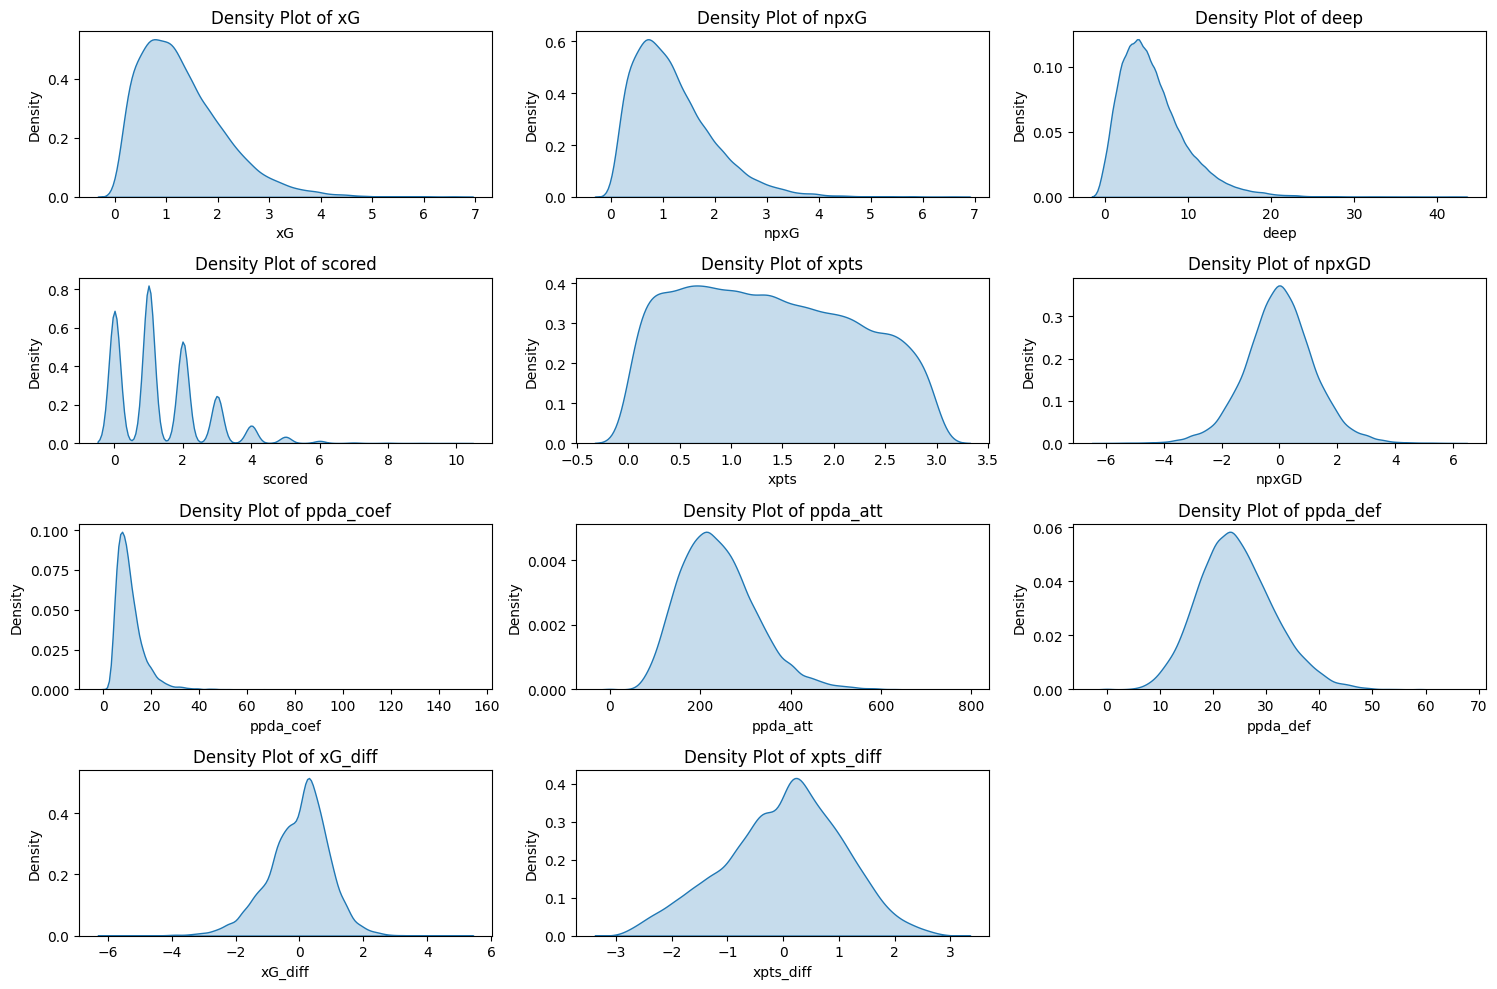

In [29]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).drop(['wins', 'draws', 'loses', 'xGA', 'npxGA', 'deep_allowed', 'missed', 'xGA_diff', 'oppda_coef', 'oppda_def', 'oppda_att'], axis=1).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)  # Adjust layout for readability
    sns.kdeplot(df[column], fill=True)  # Replaced shade=True with fill=True
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

#### Looking at the distributions per yer:

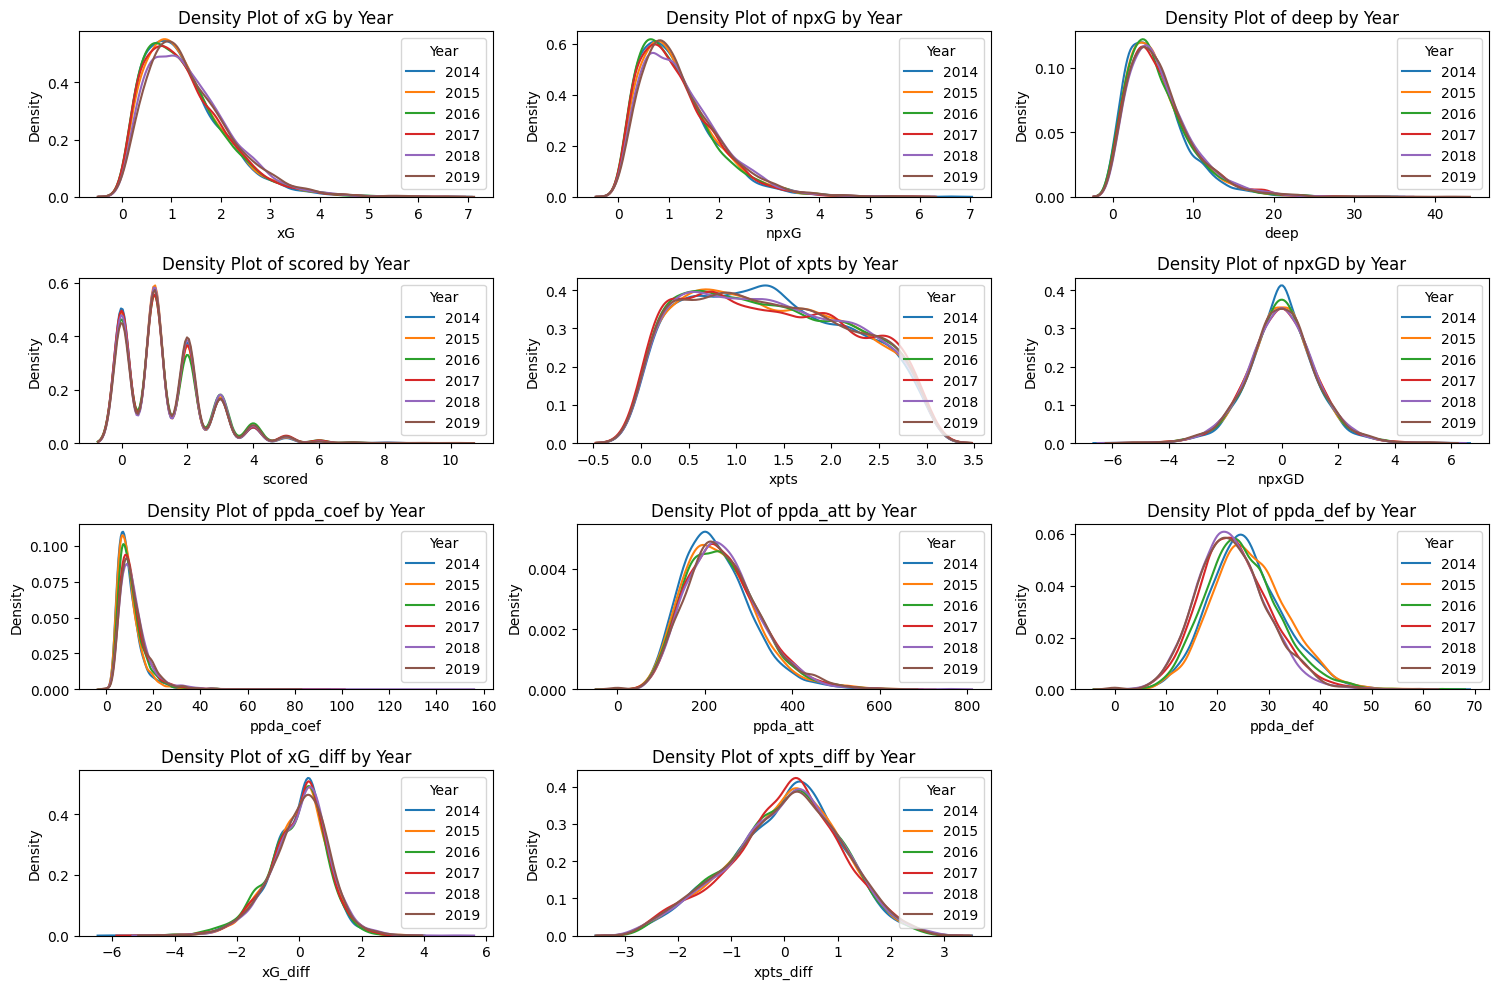

In [30]:
years = df['year'].unique()

plt.figure(figsize=(15, 10))

# Loop through each numerical column and create a subplot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)

    # Loop through each year and plot its density for the current column
    for year in years:
        sns.kdeplot(df[df['year'] == year][column], fill=False, label=str(year), alpha=1)

    # Set title and labels
    plt.title(f'Density Plot of {column} by Year')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend(title='Year')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

#### And per league:

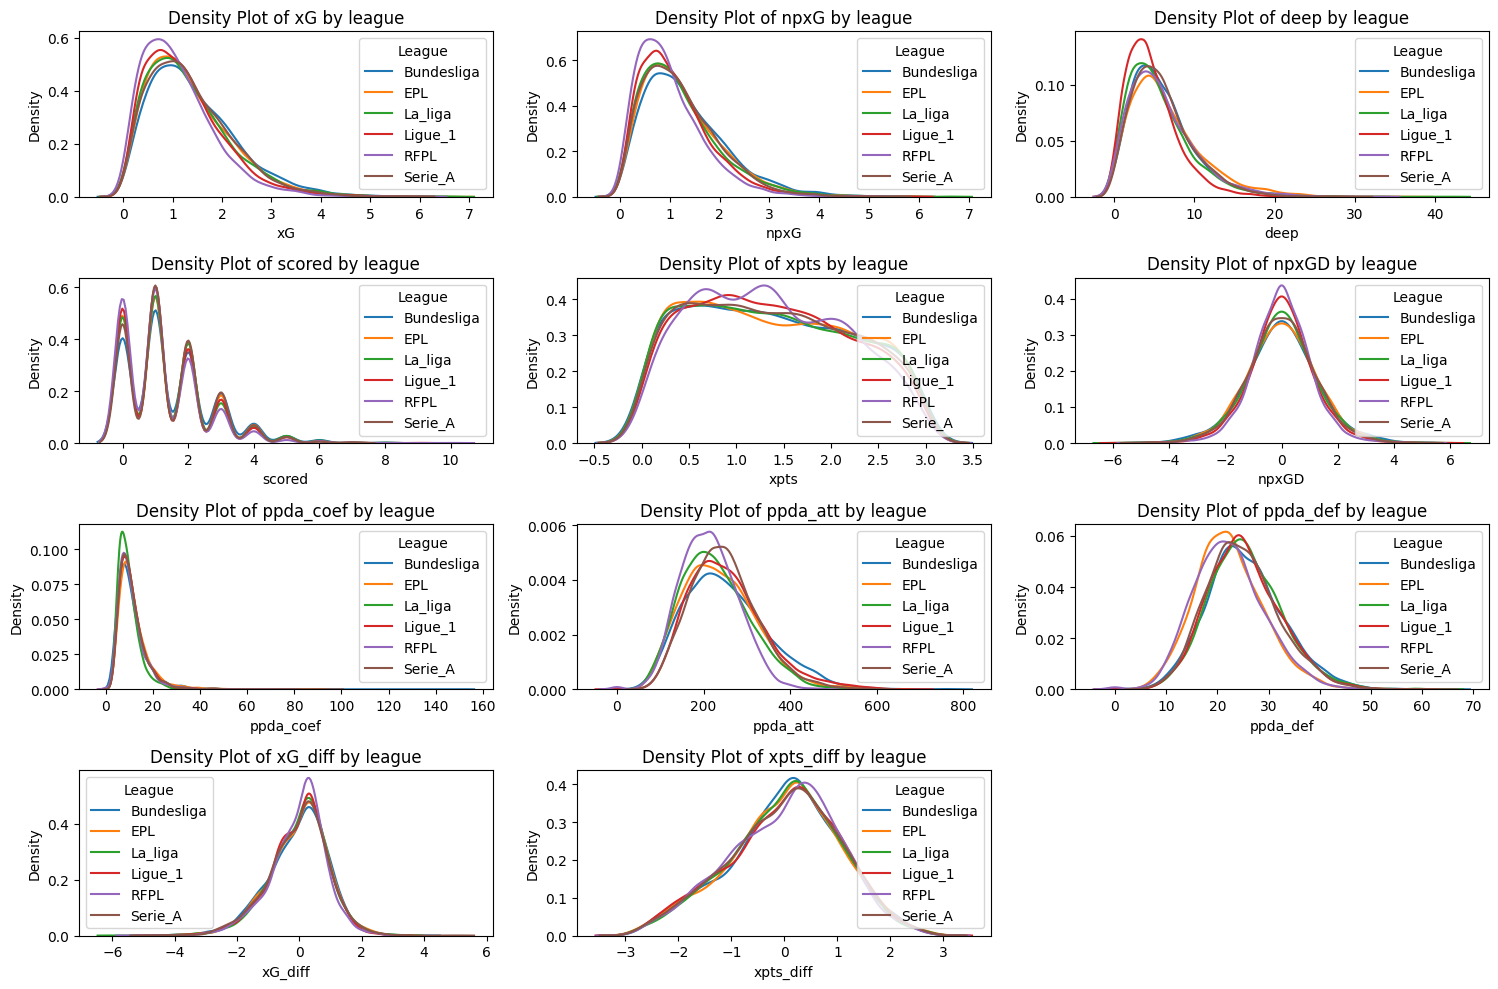

In [31]:
leagues = df['league'].unique()

plt.figure(figsize=(15, 10))

# Loop through each numerical column and create a subplot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)

    # Loop through each league and plot its density for the current column
    for league in leagues:
        sns.kdeplot(df[df['league'] == league][column], fill=False, label=str(league), alpha=1)

    # Set title and labels
    plt.title(f'Density Plot of {column} by league')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend(title='League')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

## Pre Processing